# Homework 3 - Ishan Dane

In [2]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [3]:
#Load MNIST Dataset
mnist = fetch_openml('mnist_784')
X = mnist.data[:10000] / 255.0 # 10000 samples, 784 features
Y = mnist.target[:10000] # 10000 Labels

### 1) Do an SVD analysis of the digit images. You will need to reshape each image into a column vector and each column of your data matrix is a different image.

In [5]:
# Reshape each image into a collumn vector and normalize data
X_reshaped = X.T

print(X_reshaped.shape)  # 10000 images, each image is a 784 dimensional vector

# Perform SVD on data matrix X_reshaped
U, S, V = LA.svd(X_reshaped, full_matrices=False)

print(U.shape)  # 784 x 784
print(S.shape)  # 784 x 1
print(V.shape)  # 784 x 10000





(784, 10000)
(784, 784)
(784,)
(784, 10000)


### 2) What does the singular value spectrum look like and how many modes are necessary for good image reconstruction? (i.e. what is the rank r of the digit space?)

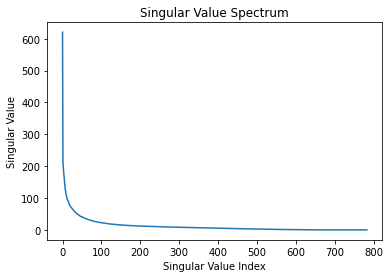

In [7]:
# Plotting Singular Value Spectrum
plt.plot(S)
plt.title('Singular Value Spectrum')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.show()

From the graph, We can see that we only need around 35 modes to reconstruct a goodm image. We can also see that the elbow point occurs at around Singular Value Index = 35 ~ (Mode 35) and there for the rank r of digit space is 35.

### 3) What is the interpretation of the U, Σ, and V matrices?

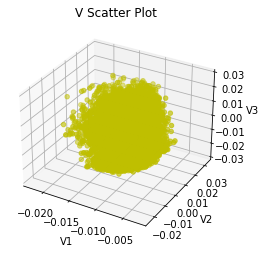

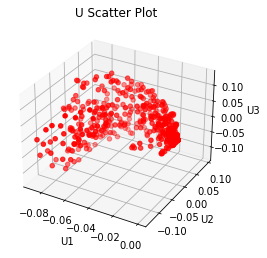

In [28]:

# Plot V
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(V[0,:], V[1,:], V[2,:], c='y', marker='o')
ax.set_title('V Scatter Plot')
ax.set_xlabel('V1')
ax.set_ylabel('V2')
ax.set_zlabel('V3')
plt.show() 

# Plot U
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(U[:, 0], U[:, 1], U[:, 2], c='r', marker='o')
ax.set_title('U Scatter Plot')
ax.set_xlabel('U1')
ax.set_ylabel('U2')
ax.set_zlabel('U3')
plt.show()




### 4) On a 3D plot, project onto three selected V-modes (columns) colored by their digit label. For example, columns 2,3, and 5

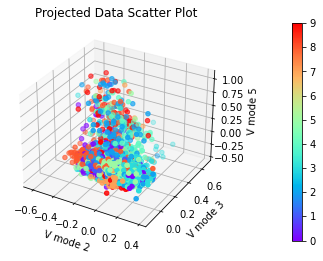

In [25]:
selected_v = V[:, [2, 3, 5]]

X_proj = np.dot(X_reshaped.T, selected_v)

# 3D Plot the projected data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot = ax.scatter(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2], c=Y.astype(int), cmap='rainbow')
plt.colorbar(plot, pad = 0.2)
ax.set_title('Projected Data Scatter Plot')
ax.set_xlabel('V mode 2')
ax.set_ylabel('V mode 3')
ax.set_zlabel('V mode 5')
plt.show()


## Once you have performed the above and have your data projected into PCA space, you will build a classifier to identify individual digits in the training set.

In [41]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

### 1) Pick two digits. See if you can build a linear classifier (LDA) that can reasonable identify/classify them.

In [42]:
# Linear classifier with digits 9 and 5

#Training Data
digit1_train_index = np.where(Y_train == '9')[0].tolist()
digit2_train_index = np.where(Y_train == '5')[0].tolist()

digit1_train_data = X_train.values[digit1_train_index , :]
digit2_train_data = X_train.values[digit2_train_index , :]

train_data = np.concatenate((digit1_train_data, digit2_train_data), axis=0)
train_index = digit1_train_index + digit2_train_index
train_labels = Y_train.values[train_index]

#Testing Data
digit1_test_index = np.where(Y_test == '9')[0].tolist()
digit2_test_index = np.where(Y_test == '5')[0].tolist()
test_index = digit1_test_index + digit2_test_index
test_data = X_test.values[test_index, :]
test_labels = Y_test.values[test_index]

lda = LinearDiscriminantAnalysis()
lda.fit(train_data, train_labels)
y_pred = lda.predict(test_data)
y_pred2 = lda.predict(train_data)

print("Train Accuracy: ", accuracy_score(train_labels, y_pred2))
print("Test Accuracy: ", accuracy_score(test_labels, y_pred))


Train Accuracy:  0.9882775571941766
Test Accuracy:  0.9851466765688823


### 2) Pick three digits. Try to build a linear classifier to identify these three now

In [43]:
# Linear classifier with digits 4, 6. 8
# Compute the LDA projection matrix and project training data onto it 


#Training Data
digit1_train_index = np.where(Y_train == '4')[0].tolist()
digit2_train_index = np.where(Y_train == '6')[0].tolist()
digit3_train_index = np.where(Y_train == '8')[0].tolist()

digit1_train_data = X_train.values[digit1_train_index , :]
digit2_train_data = X_train.values[digit2_train_index , :]
digit3_train_data = X_train.values[digit3_train_index , :]

train_data = np.concatenate((digit1_train_data, digit2_train_data, digit3_train_data), axis=0)
train_index = digit1_train_index + digit2_train_index + digit3_train_index
train_labels = Y_train.values[train_index]

#Testing Data
digit1_test_index = np.where(Y_test == '4')[0].tolist()
digit2_test_index = np.where(Y_test == '6')[0].tolist()
digit3_test_index = np.where(Y_test == '8')[0].tolist()
test_index = digit1_test_index + digit2_test_index + digit3_test_index
test_data = X_test.values[test_index, :]
test_labels = Y_test.values[test_index]

lda = LinearDiscriminantAnalysis()
lda.fit(train_data, train_labels)
y_pred = lda.predict(test_data)
y_pred2 = lda.predict(train_data)

print("Train Accuracy: ", accuracy_score(train_labels, y_pred2))
print("Test Accuracy: ", accuracy_score(test_labels, y_pred))


Train Accuracy:  0.9777265278873581
Test Accuracy:  0.9757905138339921


### 3) Which two digits in the data set appear to be the most difficult to separate? Quantify the accuracy of the separation with LDA on the test data.

In [45]:
# Dictionary to store the accuracy of each classifier
dict = {}

for i in range(0, 10):
    for j in range(i + 1, 10):
            # Linear classifier with digits i and j
            # Compute the LDA projection matrix and project training data onto it 

            #Training Data
            digit1_train_index = np.where(Y_train == str(i))[0].tolist()
            digit2_train_index = np.where(Y_train == str(j))[0].tolist()

            digit1_train_data = X_train.values[digit1_train_index , :]
            digit2_train_data = X_train.values[digit2_train_index , :]

            train_data = np.concatenate((digit1_train_data, digit2_train_data), axis=0)
            train_index = digit1_train_index + digit2_train_index
            train_labels = Y_train.values[train_index]

            #Testing Data
            digit1_test_index = np.where(Y_test == str(i))[0].tolist()
            digit2_test_index = np.where(Y_test == str(j))[0].tolist()
            test_index = digit1_test_index + digit2_test_index
            test_data = X_test.values[test_index, :]
            test_labels = Y_test.values[test_index]

            lda = LinearDiscriminantAnalysis()
            lda.fit(train_data, train_labels)
            y_pred = lda.predict(test_data)

            dict[str(i) + str(j)] = accuracy_score(test_labels, y_pred)
            print("Digits: " + str(i) + " and " + str(j) + " Accuracy: ", accuracy_score(test_labels, y_pred))



Digits: 0 and 1 Accuracy:  0.9918450560652395
Digits: 0 and 2 Accuracy:  0.9853103195005508
Digits: 0 and 3 Accuracy:  0.9902737752161384
Digits: 0 and 4 Accuracy:  0.9950720242608037
Digits: 0 and 5 Accuracy:  0.985474006116208
Digits: 0 and 6 Accuracy:  0.9850310332238043
Digits: 0 and 7 Accuracy:  0.9940267041461701
Digits: 0 and 8 Accuracy:  0.9851851851851852
Digits: 0 and 9 Accuracy:  0.9920376402461093
Digits: 1 and 2 Accuracy:  0.978523489932886
Digits: 1 and 3 Accuracy:  0.9835146719419716
Digits: 1 and 4 Accuracy:  0.9930915371329879
Digits: 1 and 5 Accuracy:  0.9839888618169161
Digits: 1 and 6 Accuracy:  0.9936582109479306
Digits: 1 and 7 Accuracy:  0.9887205929745407
Digits: 1 and 8 Accuracy:  0.9631383158606696
Digits: 1 and 9 Accuracy:  0.9900662251655629
Digits: 2 and 3 Accuracy:  0.966228226093139
Digits: 2 and 4 Accuracy:  0.9798130841121495
Digits: 2 and 5 Accuracy:  0.9724839803995476
Digits: 2 and 6 Accuracy:  0.9755043227665706
Digits: 2 and 7 Accuracy:  0.98300381

In [50]:
worst_digits = min(dict, key=dict.get)
print("Worst Digits: " + "(" + worst_digits[0] + ", " + worst_digits[1] + ")" + " Accuracy: ", dict[worst_digits])

Worst Digits: (5, 8) Accuracy:  0.9498098859315589


### 4) Which two digits in the data set are most easy to separate? Quantify the accuracy of the separation with LDA on the test data.

In [51]:
best_digits = max(dict, key=dict.get)
print("Best Digits: " + "(" + best_digits[0] + ", " + best_digits[1] + ")" + " Accuracy: ", dict[best_digits])

Best Digits: (6, 7) Accuracy:  0.9968954812004139


### 5) SVM (support vector machines) and decision tree classifiers were the state-of-the-art until about 2014. How well do these separate between all ten digits? (see code below to get started

In [48]:
#SVM Classifier
svm_clf = SVC()
svm_clf.fit(X_train, Y_train)

y_pred = svm_clf.predict(X_test)

print("Accuracy: ", accuracy_score(Y_test, y_pred))


Accuracy:  0.9764285714285714


In [49]:
# Decision Tree Classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, Y_train)

y_pred = tree_clf.predict(X_test)

print("Accuracy: ", accuracy_score(Y_test, y_pred))


Accuracy:  0.872


In [52]:
# Plot Decision Tree Structure
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(tree_clf, ax=ax)
plt.show()

### 6) Compare the performance between LDA, SVM and decision trees on the hardest and easiest pair of digits to separate (from above).

In [40]:
# Hardest Digits (5, 8):

# Training Data
digit1_train_index = np.where(Y_train == '5')[0].tolist()
digit2_train_index = np.where(Y_train == '8')[0].tolist()

digit1_train_data = X_train.values[digit1_train_index , :]
digit2_train_data = X_train.values[digit2_train_index , :]

train_data = np.concatenate((digit1_train_data, digit2_train_data), axis=0)
train_index = digit1_train_index + digit2_train_index
train_labels = Y_train.values[train_index]

#Testing Data
digit1_test_index = np.where(Y_test == '5')[0].tolist()
digit2_test_index = np.where(Y_test == '8')[0].tolist()
test_index = digit1_test_index + digit2_test_index
test_data = X_test.values[test_index, :]
test_labels = Y_test.values[test_index]

# SVM Classifier
svm_clf2 = SVC()
svm_clf2.fit(train_data, train_labels)

y_pred2 = svm_clf2.predict(test_data)

print("SVM Accuracy: ", accuracy_score(test_labels, y_pred2))

# Decision Tree Classifier
tree_clf2 = DecisionTreeClassifier()
tree_clf2.fit(train_data, train_labels)

y_pred3 = tree_clf2.predict(test_data)

print("Decision Trees Accuracy: ", accuracy_score(test_labels, y_pred3))

print("LDA Accuracy: ", dict[worst_digits])

SVM Accuracy:  0.9938673821387505
Decision Trees Accuracy:  0.9609045611345343
LDA Accuracy:  0.9512550018188433


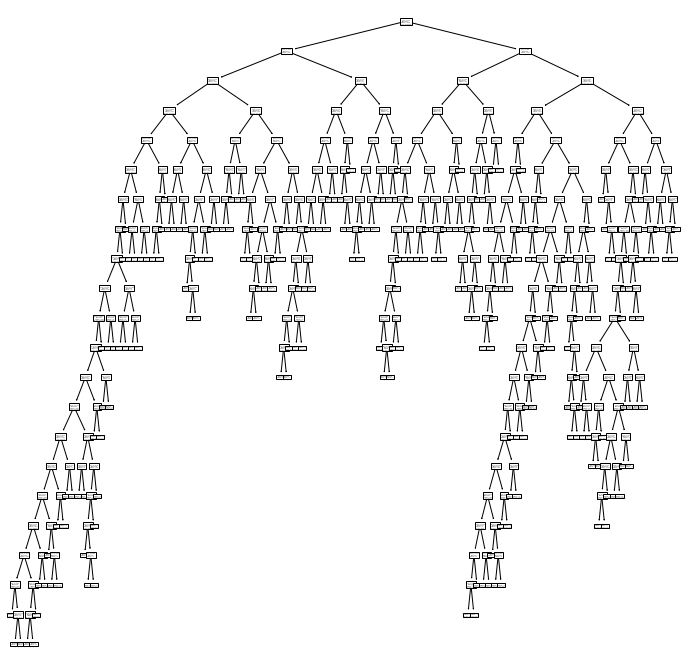

In [90]:
# Plot Decision Tree Structure
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(tree_clf2, ax=ax)
plt.show()

In [19]:
# Easiest Digits (6, 7):

# Training Data
digit1_train_index = np.where(Y_train == '6')[0].tolist()
digit2_train_index = np.where(Y_train == '7')[0].tolist()

digit1_train_data = X_train.values[digit1_train_index , :]
digit2_train_data = X_train.values[digit2_train_index , :]

train_data = np.concatenate((digit1_train_data, digit2_train_data), axis=0)
train_index = digit1_train_index + digit2_train_index
train_labels = Y_train.values[train_index]

#Testing Data
digit1_test_index = np.where(Y_test == '6')[0].tolist()
digit2_test_index = np.where(Y_test == '7')[0].tolist()
test_index = digit1_test_index + digit2_test_index
test_data = X_test.values[test_index, :]
test_labels = Y_test.values[test_index]

# SVM Classifier
svm_clf3 = SVC()
svm_clf3.fit(train_data, train_labels)

y_pred4 = svm_clf3.predict(test_data)

print("SVM Accuracy: ", accuracy_score(test_labels, y_pred4))

# Decision Tree Classifier
tree_clf3 = DecisionTreeClassifier()
tree_clf3.fit(train_data, train_labels)

y_pred5 = tree_clf3.predict(test_data)

print("Decision Trees Accuracy: ", accuracy_score(test_labels, y_pred5))

print("LDA Accuracy: ", dict[best_digits])


SVM Accuracy:  0.9993101069334254
Decision Trees Accuracy:  0.9927561228009658
LDA Accuracy:  0.9968954812004139


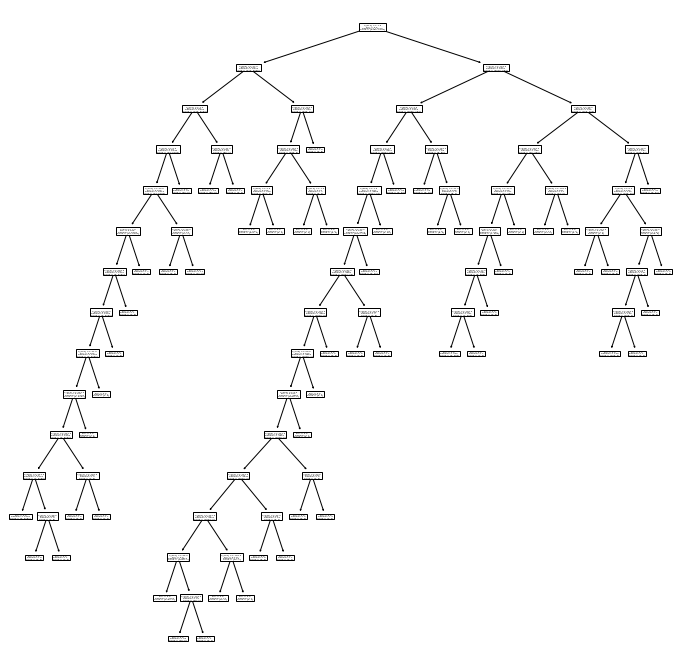

In [91]:
# Plot Decision Tree Structure
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(tree_clf3, ax=ax)
plt.show()